### Заменил функцию активации 'tanh' на 'relu' в слое 'hidden_three' и добавил Dropout слоев после каждого скрытого слоя.
- Функция активации 'tanh' может привести к затуханию градиента в глубоких нейронных сетях. Замена ее на функцию 'relu' помогает избежать этой проблемы.
- Dropout слои помогают бороться с переобучением, отключая случайные нейроны во время обучения.
- Замена функции активации и добавление Dropout слоев помогают улучшить обобщающую способность модели, предотвращают переобучение и позволяют более точно предсказывать классы изображений.

In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Нормализация данных и преобразование размерности
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Создание модели
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', name='hidden_one'),
    keras.layers.Dropout(0.5),  # Добавление Dropout слоя
    keras.layers.Dense(128, activation='relu', name='hidden_two'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', name='hidden_three'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', name='hidden_four'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, name='output')
])

In [5]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Обучение модели
hist = model.fit(train_images, train_labels, batch_size=250, epochs=50)

Epoch 1/50
240/240 [==============================] - 3s 6ms/step - loss: 1.5029 - accuracy: 0.4299
Epoch 2/50
240/240 [==============================] - 2s 7ms/step - loss: 0.8444 - accuracy: 0.6768
Epoch 3/50
240/240 [==============================] - 2s 7ms/step - loss: 0.7076 - accuracy: 0.7428
Epoch 4/50
240/240 [==============================] - 2s 7ms/step - loss: 0.6467 - accuracy: 0.7715
Epoch 5/50
240/240 [==============================] - 2s 7ms/step - loss: 0.6025 - accuracy: 0.7917
Epoch 6/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5803 - accuracy: 0.8025
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5653 - accuracy: 0.8110
Epoch 8/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5446 - accuracy: 0.8154
Epoch 9/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5295 - accuracy: 0.8237
Epoch 10/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5104 - accuracy: 0.8295

In [7]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3714 - accuracy: 0.8644 - 709ms/epoch - 2ms/step


In [8]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8644000291824341


In [9]:
# Вывод информации о модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_one (Dense)          (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 hidden_two (Dense)          (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 hidden_three (Dense)        (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 hidden_four (Dense)         (None, 64)                4

In [10]:
# Создание модели для получения вероятностей
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [11]:
# Предсказание классов для тестовых данных
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [12]:
# Функция для вывода изображения и соответствующих вероятностей
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape((28, 28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)

In [13]:
# Функция для вывода графика вероятностей
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

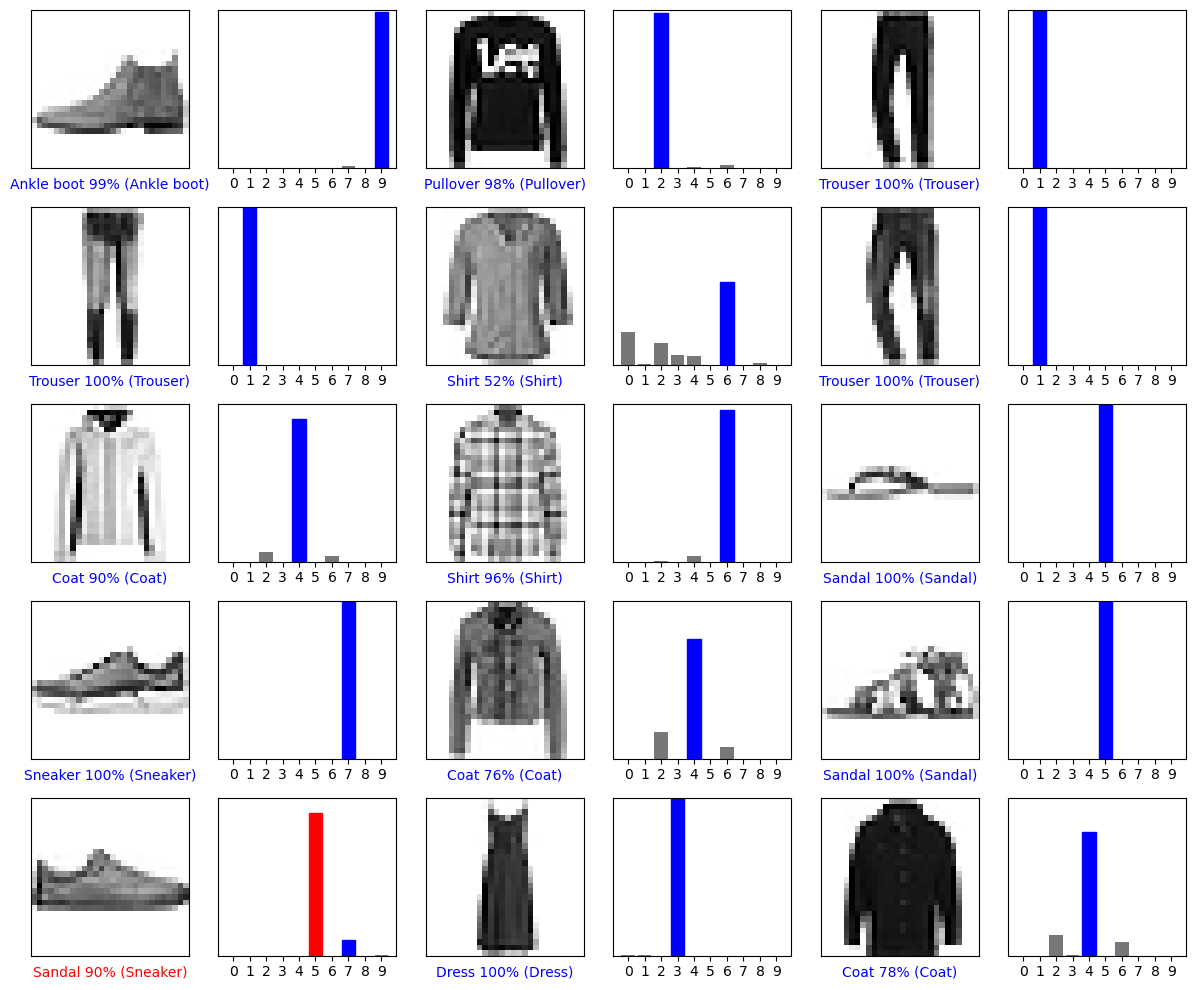

In [14]:
# Визуализация результатов для нескольких изображений
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [15]:
# Пример предсказания для одного изображения
img = test_images[1]
img = np.expand_dims(img, 0)  # Преобразование изображения в формат пакета

In [16]:
predictions_single = probability_model.predict(img)

1/1 [==============================] - 0s 28ms/step


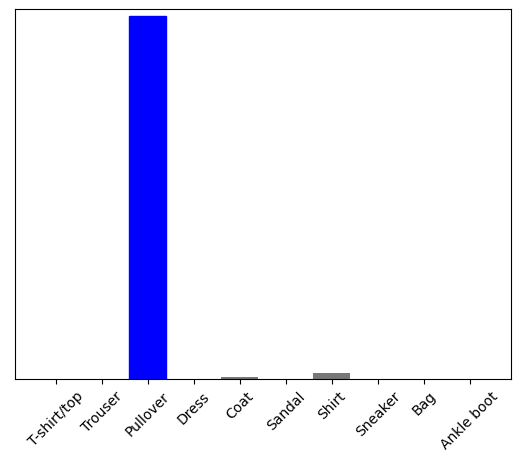

In [17]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [18]:
np.argmax(predictions_single[0])

2